###Cargar el repositorio desde Github
Upload the github repository with all the code modules

In [ ]:
import sys
sys.path.append('/content/tesis-modelamiento-computacional-de-la-ansiedad')

In [ ]:
!python --version

Python 3.11.11


In [1]:
!git clone https://github.com/Alicia-MJ/tesis-modelamiento-computacional-de-la-ansiedad.git

Cloning into 'tesis-modelamiento-computacional-de-la-ansiedad'...
remote: Enumerating objects: 1310, done.
remote: Counting objects: 100% (1310/1310), done.
remote: Compressing objects: 100% (606/606), done.
remote: Total 1310 (delta 747), reused 1236 (delta 703), pack-reused 0 (from 0)
Receiving objects: 100% (1310/1310), 26.74 MiB | 7.94 MiB/s, done.
Resolving deltas: 100% (747/747), done.


### Cragar las librerías y métodos específicos
Upload the packages and specific methods

In [ ]:

from neuronav.envs.grid_env import GridEnv, GridSize, GridObservation
from neuronav.agents.td_agents import TDSR, TDSR_RP
from neuronav.agents.dyna_agents import DynaSR, DynaSR_RP
from neuronav.envs.grid_templates import GridTemplate
from neuronav.utils import run_episode, plot_values_and_policy, plot_values_and_policy_half
import matplotlib.pyplot as plt
import numpy as np
import time




# **Tarea experimental: Cliff Walking**


# **Se define el entorno (env)**.


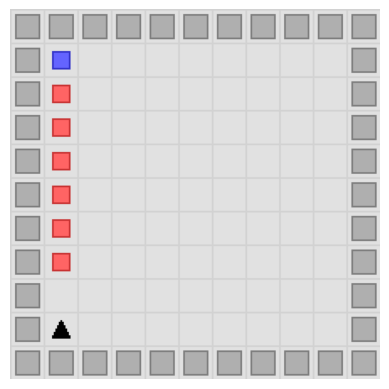

In [ ]:
reward_map = {(1, 1): 1.0,  (7, 1): -1.0, (6, 1): -1.0, (5, 1): -1.0, (4, 1): -1.0, (3, 1): -1.0, (2, 1): -1.0}
start_pos = (9, 1)

env = GridEnv(size=GridSize.small)

obs = env.reset(objects={"rewards": reward_map}, agent_pos=start_pos)
env.render()

## Evaluación del impacto de la sensibilidad a los castigos

Se implementó el modelo **Dyna $\beta$-pessimistic SR** con diferentes valores en en el parámetro de sensibilidad a las recompensas ($ω$) y su complemento (1-$\omega$), el parámetro de sensibilidad a los castigos, con el fin de evaluar el impacto de los distintos valores en el desarrollo de conductas asociadas a la ansiedad como la evitación, la aversión al riesgo, la sobreestimación y generalización del peligro. Se programaron 3 agentes diferentes y por cada uno se imprimió un mapa de calor del entorno de acuerdo a los valores estimados de cada estado, así como una gráfica del número de pasos temporales por episodio y la recompensa obtenida por episodio.


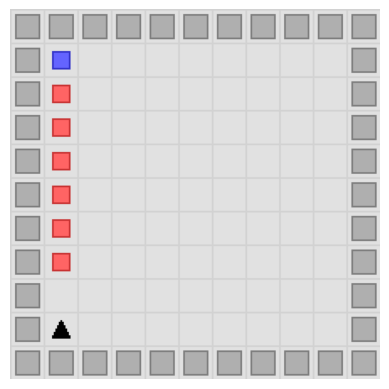

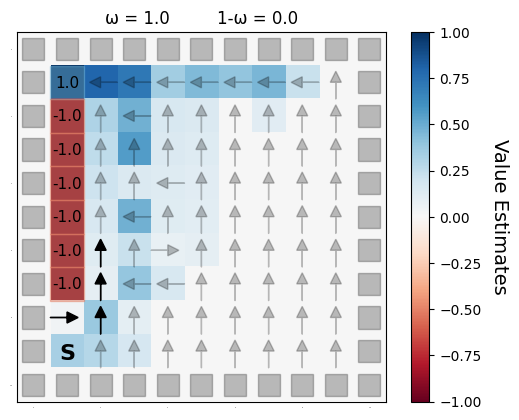

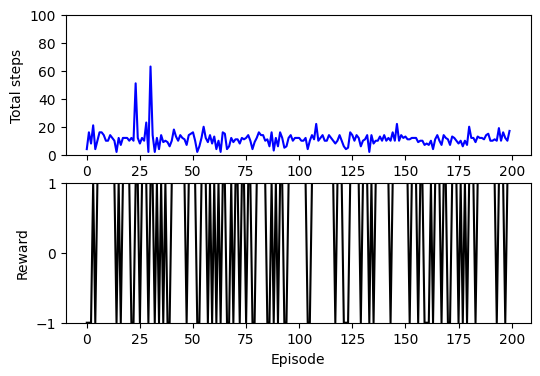

W is 1.0
Proporción de 1: 0.7
Proporción de 0: 0.0
Proporción de -1: 0.3


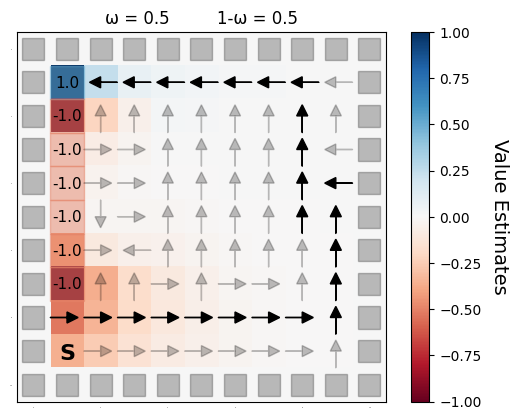

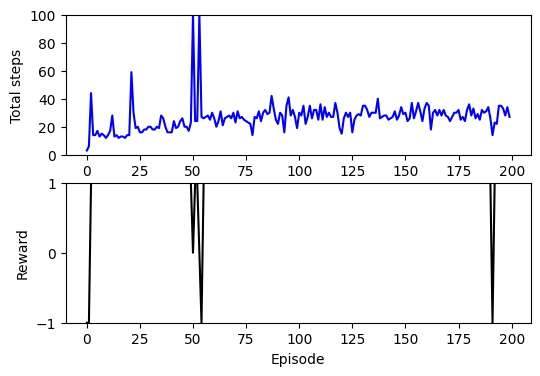

W is 0.5
Proporción de 1: 0.97
Proporción de 0: 0.01
Proporción de -1: 0.02


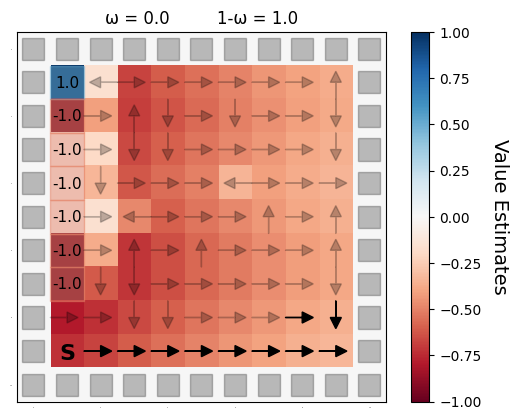

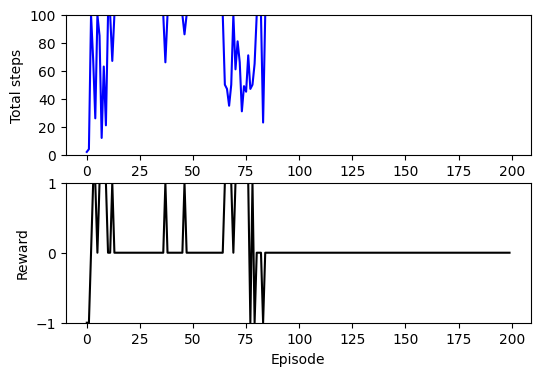

W is 0.0
Proporción de 1: 0.105
Proporción de 0: 0.87
Proporción de -1: 0.025
Tiempo total de ejecución para 200 episodios: 28.97473669052124 segundos


In [ ]:
num_episodes = 200
max_steps = 100
w_values = [1.0, 0.5, 0.0]
num_recall = 3


reward_map = {(1, 1): 1.0,  (7, 1): -1.0, (6, 1): -1.0, (5, 1): -1.0, (4, 1): -1.0, (3, 1): -1.0, (2, 1): -1.0}
start_pos = (9, 1)

env = GridEnv(size=GridSize.small)

obs = env.reset(objects={"rewards": reward_map}, agent_pos=start_pos)
env.render()

start_time = time.time()

for w_value in w_values:


    agent = DynaSR(
        env.state_size,
        env.action_space.n,
        lr=0.1,
        gamma=0.9,
        poltype="egp",
        epsilon=0.2,
        w_value=w_value
    )

    total_steps = []
    tot_returns = []


    for i in range(num_episodes):
        agent, steps, ep_return = run_episode(
            env, agent, max_steps=max_steps, objects={"rewards": reward_map}, start_pos=start_pos
        )
        tot_returns.append(ep_return)
        total_steps.append(steps)

    pw = 1-w_value

    plot_values_and_policy(agent, env, start_pos, f"ω = {w_value}         1-ω = {pw}", objects={"rewards": reward_map})

    fig, (ax1, ax2) = plt.subplots(2, figsize=(6, 4))
    ax1.plot(total_steps, color="blue")
    ax1.set_ylabel('Total steps')
    ax1.set_xlabel('Episode')
    ax1.set_ylim(0,100)

    ax2.plot(tot_returns, color="black")
    ax2.set_ylabel('Reward')
    ax2.set_xlabel('Episode')
    ax2.set_ylim(-1,1)
    ax2.set_yticks([-1, 0, 1])

    plt.show()

    print(f'W is {w_value}')

    fr_1 = (tot_returns.count(-1))/len(tot_returns)
    fr_0 = tot_returns.count(0)/len(tot_returns)
    fr_n = tot_returns.count(1)/len(tot_returns)

    print(f"Proporción de 1: {fr_n}")
    print(f"Proporción de 0: {fr_0}")
    print(f"Proporción de -1: {fr_1}")

# Fin del temporizador
end_time = time.time()

# Cálculo del tiempo total de ejecución en segundos
total_time = end_time - start_time
print(f"Tiempo total de ejecución para {num_episodes} episodios: {total_time} segundos")

## **Evaluación del impacto de la tasa de aprendizaje a los castigos**

Se implementó el modelo **Dyna $\alpha$-SR** con diferentes valores en la tasa de aprendizaje a los castigos, con el fin de evaluar el impacto de los distintos valores en el desarrollo de conductas asociadas a la ansiedad como la evitación, la aversión al riesgo, la sobreestimación y generalización del peligro. Se programaron 3 agentes diferentes y por cada uno se imprimió un mapa de calor del entorno de acuerdo a los valores estimados de cada estado, así como una gráfica del número de pasos temporales por episodio y la recompensa obtenida por episodio.

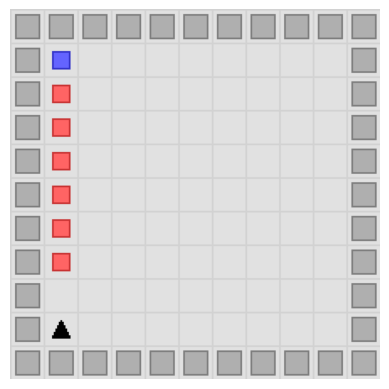

lr_p is 0.05
Proporción de 1: 0.6
Proporción de 0: 0.03
Proporción de -1: 0.37
lr_p is 0.075
Proporción de 1: 0.67
Proporción de 0: 0.02
Proporción de -1: 0.31
lr_p is 0.1
Proporción de 1: 0.605
Proporción de 0: 0.045
Proporción de -1: 0.35
Tiempo total de ejecución para 200 episodios: 5.843931198120117 segundos


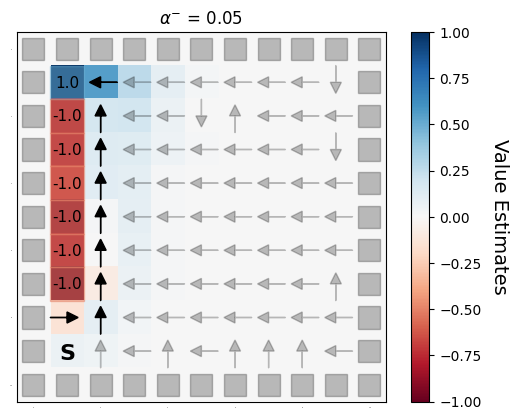

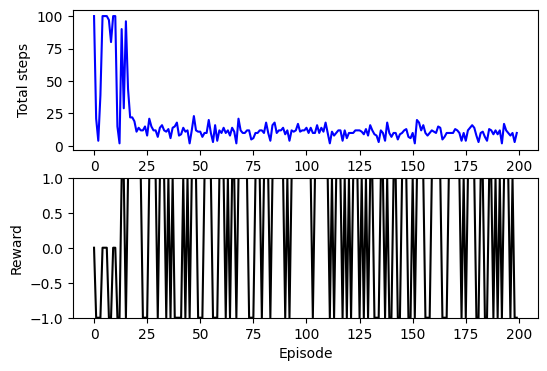

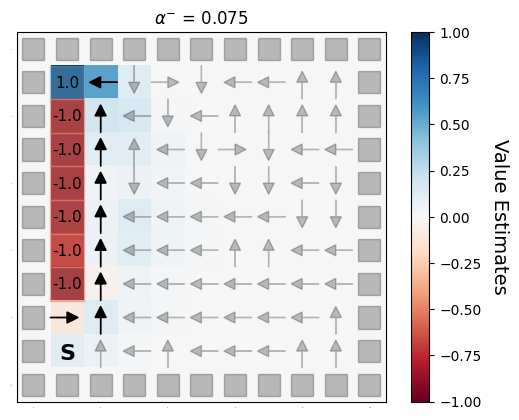

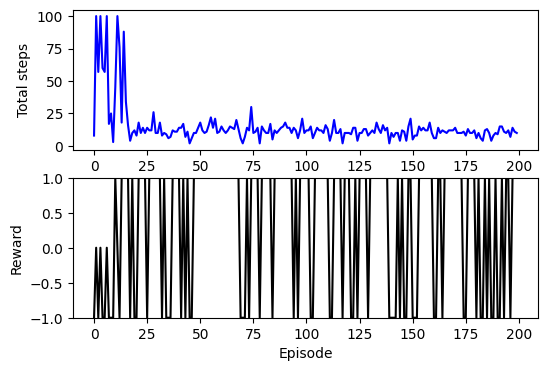

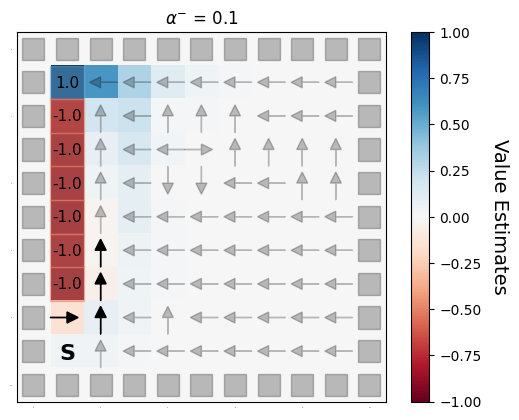

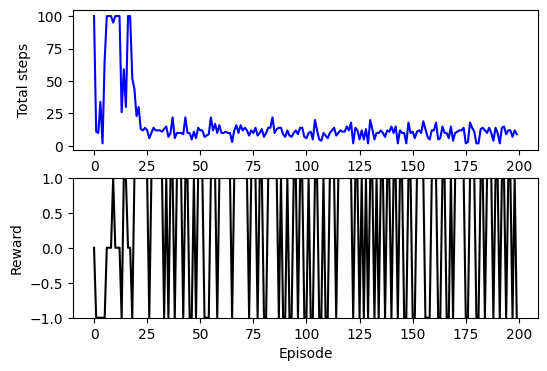

In [ ]:
num_episodes = 200
max_steps = 100
lr_p_values = [0.05, 0.075, 0.1]
num_recall = 3

reward_map = {(1, 1): 1.0, (7, 1): -1.0, (6, 1): -1.0, (5, 1): -1.0, (4, 1): -1.0, (3, 1): -1.0, (2, 1): -1.0}
start_pos = (9, 1)

env = GridEnv(size=GridSize.small)

obs = env.reset(objects={"rewards": reward_map}, agent_pos=start_pos)
env.render()

start_time = time.time()

for lr_p in lr_p_values:


    agent = DynaSR_RP(
        env.state_size,
        env.action_space.n,
        lr=0.05,
        gamma=0.9,
        poltype="egreedy",
        epsilon=0.2,
        num_recall=num_recall,
        lr_p=lr_p
    )

    total_steps = []
    tot_returns = []

    for i in range(num_episodes):
        agent, steps, ep_return = run_episode(
            env, agent, max_steps=max_steps, objects={"rewards": reward_map}, start_pos=start_pos
        )
        tot_returns.append(ep_return)
        total_steps.append(steps)

    plot_values_and_policy(agent, env, start_pos, f"$\\alpha^{{-}}$ = {lr_p}", objects={"rewards": reward_map})

    fig, (ax1, ax2) = plt.subplots(2, figsize=(6, 4))
    ax1.plot(total_steps, color="blue")
    ax1.set_ylabel('Total steps')
    ax1.set_xlabel('Episode')

    ax2.plot(tot_returns, color="black")
    ax2.set_ylabel('Reward')
    ax2.set_xlabel('Episode')
    ax2.set_ylim(-1,1)

    print(f'lr_p is {lr_p}')

    fr_1 = (tot_returns.count(-1))/len(tot_returns)
    fr_0 = tot_returns.count(0)/len(tot_returns)
    fr_n = tot_returns.count(1)/len(tot_returns)

    print(f"Proporción de 1: {fr_n}")
    print(f"Proporción de 0: {fr_0}")
    print(f"Proporción de -1: {fr_1}")

# Fin del temporizador
end_time = time.time()

# Cálculo del tiempo total de ejecución en segundos
total_time = end_time - start_time
print(f"Tiempo total de ejecución para {num_episodes} episodios: {total_time} segundos")
